## Section 1: Business Understanding

Job satisfaction is a crucial aspect of workplace productivity and employee retention. Companies want to understand the factors that influence job satisfaction so they can improve their policies and work environments. In this analysis, we aim to explore the relationship between salary, remote work, and education level with job satisfaction.

## Key Questions:

- Does salary significantly impact job satisfaction?
- How does remote work influence job satisfaction?
- What role does education level play in determining satisfaction?
- Can we predict job satisfaction based on employment type and salary?
- Which factors contribute the most to job satisfaction?

## Section 2: Importing Libraries

Importing the required libraries:

1. Pandas
2. Matplot
3. Seaborn
4. Sklearn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score

## Section 3: Data Understanding

### 3.1 Loading the Dataset

In [19]:
# Defining a function to read the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [20]:
# Load the dataset
file_path = "survey_results_public.csv"
df = load_data(file_path)

### 3.2 Exploratory Data Analysis (EDA)

In [10]:
df.shape

(65437, 114)

In [107]:
df.dtypes.value_counts()

object     100
float64     13
int64        1
Name: count, dtype: int64

In [108]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [110]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


## Section 4: Data Preparation

In [21]:
#Identifying the columns with missing values in each column
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

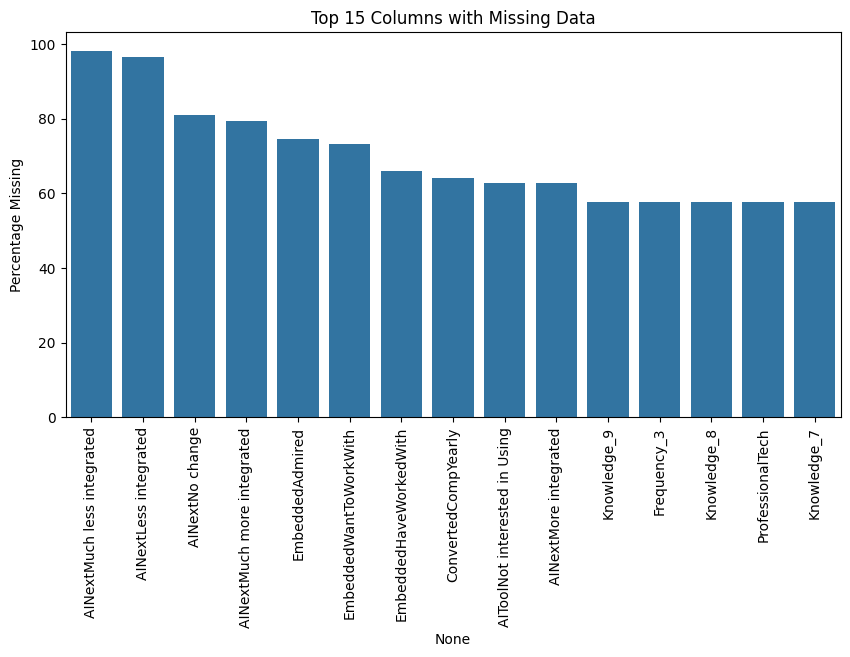

In [22]:
#Visualizing top 15 columns with highest number of missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index[:15], y=missing_values.values[:15])
plt.xticks(rotation=90)
plt.ylabel("Percentage Missing")
plt.title("Top 15 Columns with Missing Data")
plt.show()

In [123]:
# Data preprocessing: Select relevant columns as these will only be used for our analysis and model training
df = df[['ConvertedCompYearly', 'RemoteWork', 'JobSat','EdLevel']].dropna()

In [138]:
#Checking corelation of all these four feature with each other to have a better understand of how they are relating to each other
corr_matrix = df.corr()

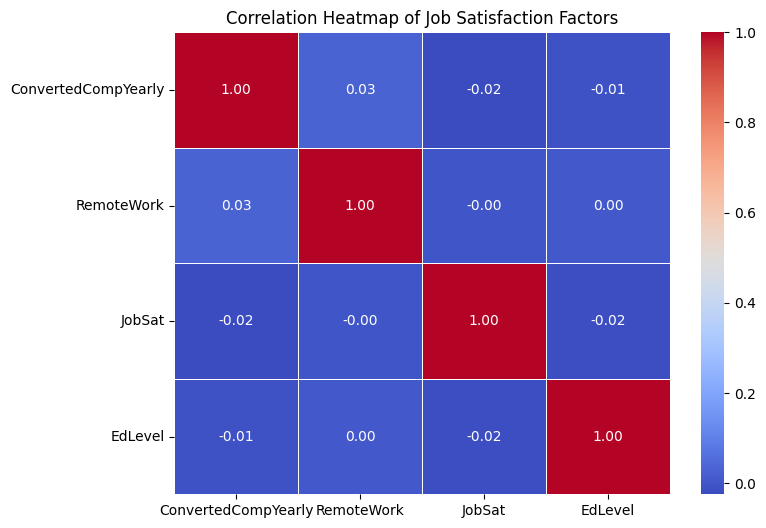

In [139]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Job Satisfaction Factors")
plt.show()

In [124]:
#Encoding categorical variables because our machine learning models require numerical input to process data effectively. 
#Only applying encoding on our selected features
# Encoding categorical variables
label_encoders = {}
categorical_features = ["JobSat", "RemoteWork", "EdLevel"]

In [125]:
# Defining function to encode the selected categorical variables
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le

In [126]:
# Selecting features and target variable for our model
features = ["RemoteWork", "EdLevel", "ConvertedCompYearly"]
target = "JobSat"

In [127]:
# Handling missing salary values by filling with median
# We are filling the missing salary (ConvertedCompYearly) values with the median because salary data is often highly skewed due to extreme values
# mean can be pulled by extreme salaries, making it an unreliable replacement for missing values
# The median represents the middle value, making it more robust and representative of the majority of salaries.
df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median(), inplace=True)

/tmp/ipykernel_13/1643806326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median(), inplace=True)


## Section 5: Data Modelling

In [128]:
# Splitting the dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Feature scaling
# Using StandardScaler to improve performance of our machine learning models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [131]:
# Predictions
y_pred = model.predict(X_test)

In [134]:
# Train a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [135]:
# Predictions using Logistic Regression
y_pred_log = log_reg_model.predict(X_test)

In [136]:
accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='weighted')
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')

/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Section 6: Evaluation

### Question 1 - Does salary significantly impact job satisfaction?

The below analysis shows that while higher salaries often correlate with better job satisfaction, they don’t guarantee job satisfaction. Some of our respondents earning top-tier salaries still reported dissatisfaction.

/tmp/ipykernel_13/2655201322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["JobSat"], y=df["ConvertedCompYearly"], palette="Spectral")


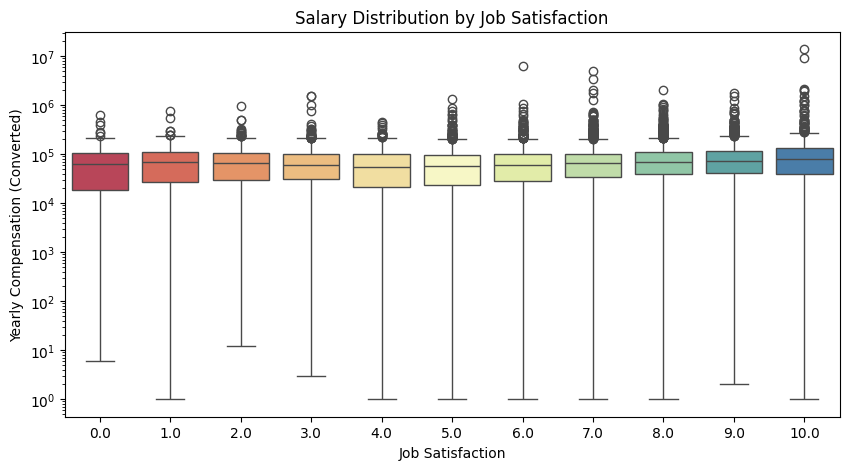

In [116]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["JobSat"], y=df["ConvertedCompYearly"], palette="Spectral")
plt.title("Salary Distribution by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Yearly Compensation (Converted)")
plt.yscale("log")
plt.show()

### Question 2 - How does remote work influence job satisfaction?

Our data suggests that remote and hybrid workers generally report higher job satisfaction, however it cannot be applied as a general consensus and some workers might not be totally satisifed with working in isolation.

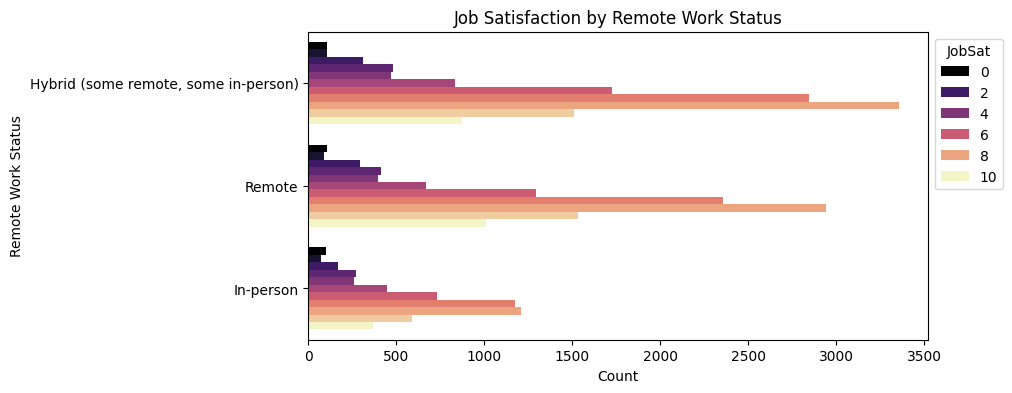

In [114]:
plt.figure(figsize=(8, 4))
sns.countplot(y=df["RemoteWork"], hue=df["JobSat"], palette="magma", order=df["RemoteWork"].value_counts().index)
plt.title("Job Satisfaction by Remote Work Status")
plt.xlabel("Count")
plt.ylabel("Remote Work Status")
plt.legend(title="JobSat", bbox_to_anchor=(1, 1))
plt.show()

### Question 3 - What role does education level play in determining satisfaction?

Higher education doesn’t necessarily guarantee higher job satisfaction. Many highly educated professionals still reported dissatisfaction — possibly due to mismatched expectations, underemployment, or the brutal reality of student loans. On the flip side, some high school grads reported sky-high satisfaction, proving that career fulfillment isn’t just about degrees but about finding the right fit.

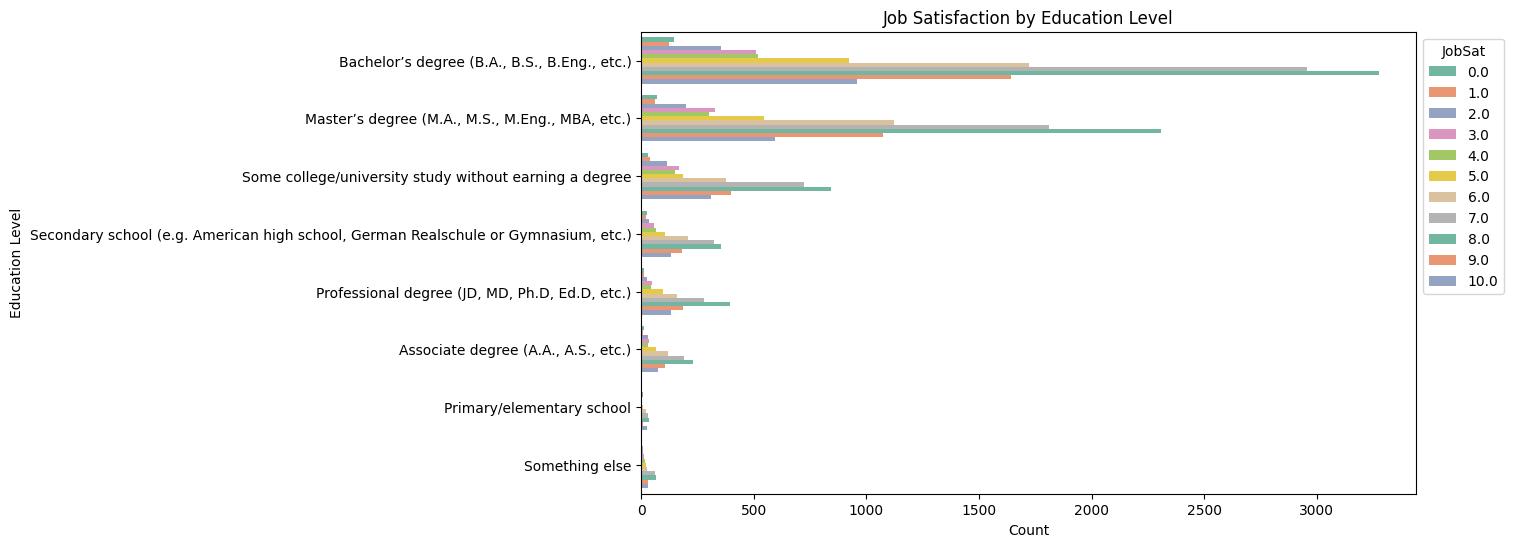

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df["EdLevel"], hue=df["JobSat"], palette="Set2", order=df["EdLevel"].value_counts().index[:10])
plt.title("Job Satisfaction by Education Level")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="JobSat", bbox_to_anchor=(1, 1))
plt.show()

### Question 4 - Can we predict job satisfaction based on employment type and salary?

#### Analysis of Models

- Logistic Regression scored 0.24 accuracy, while Random Forest fared even worse at 0.18. 

- The low accuracy suggests that workplace happiness is about way more than just money and flexibility. Maybe things like a toxic boss, bad coffee, or a broken office printer play a bigger role.

- Random Forest Overfitting: The model might have captured noise rather than real patterns, leading to poor generalization.

- Class Imbalance Issues: If the dataset has way more happy employees than miserable ones, the model struggles to predict dissatisfaction accurately.

- Accuracy Alone Isn’t Enough: Other metrics like precision, recall, and F1-score would provide a fuller picture. But with these results? Probably not much better.

#### Evaluate the Random Forest Model

In [133]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.18699439950217797

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.04      0.04        27
           1       0.00      0.00      0.00        31
           2       0.08      0.07      0.08       228
           3       0.02      0.01      0.01        98
           4       0.06      0.05      0.05       101
           5       0.06      0.05      0.06       142
           6       0.08      0.07      0.07       206
           7       0.17      0.14      0.15       411
           8       0.22      0.23      0.22       737
           9       0.26      0.34      0.29       835
          10       0.15      0.13      0.14       398

    accuracy                           0.19      3214
   macro avg       0.10      0.10      0.10      3214
weighted avg       0.17      0.19      0.18      3214


Confusion Matrix:
[[  1   0   1   0   1   0   0   2  10   9   3]
 [  0   0   2   0   2   2   1   1  13  10   0]
 [  2   0  16 

#### Evaluate the Logistic Regression Model

In [103]:
print("Logistic Regression Model Accuracy:", accuracy_log)
print("F1 Score:", f1_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Model Accuracy: 0.2483693786474425
F1 Score: 0.09942157353161635
Precision: 0.08258477159972183
Recall: 0.2483693786474425

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.00      0.00      0.00        60
           2       0.25      0.00      0.01       488
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00       239
           5       0.00      0.00      0.00       227
           6       0.00      0.00      0.00       376
           7       0.00      0.00      0.00       797
           8       0.00      0.00      0.00      1264
           9       0.25      1.00      0.40      1446
          10       0.00      0.00      0.00       711

    accuracy                           0.25      5826
   macro avg       0.05      0.09      0.04      5826
weighted avg       0.08      0.25      0.10      5826


Confusion Matrix:
[

/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
